In [1]:
from pathlib import Path
import pandas as pd
from transformers import AutoTokenizer

# plot the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

/home/user/kew/anaconda3/envs/vllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from huggingface_hub import login

from api_secrets import HUGGINGFACE_HUB
login(token=HUGGINGFACE_HUB)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/user/kew/.cache/huggingface/token
Login successful


In [3]:
llama_tok = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")
falcon_tok = AutoTokenizer.from_pretrained("tiiuae/falcon-7b")
dir(llama_tok)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_bos_token',
 '_add_eos_token',
 '_add_tokens',
 '_additional_special_tokens',
 '_auto_class',
 '_batch_encode_plus',
 '_bos_token',
 '_call_one',
 '_cls_token',
 '_compile_jinja_template',
 '_convert_encoding',
 '_convert_id_to_token',
 '_convert_token_to_id_with_added_voc',
 '_create_repo',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eos_token',
 '_eventual_warn_about_too_long_sequence',
 '_eventually_correct_t5_max_length',
 '_from_pretrained',
 '_get_files_timestamps',
 '_get_padding_truncation_strategies',
 '_in_targe

In [4]:
print('Llama vocab size:', llama_tok.vocab_size)
print('Falcon vocab size:', falcon_tok.vocab_size)

Llama vocab size: 32000
Falcon vocab size: 65024


In [5]:
data = {'llama': {}, 'falcon': {}}

def get_average_token_counts(texts, tokenizer):
    return sum([len(tokenizer.encode(text, add_special_tokens=False)) for text in texts]) / len(texts)

for file in Path('data').glob('alpaca_eval_instructions_*.json'):
    print(file)
    df = pd.read_json(file, lines=True)
    data['llama'][file.stem.split('_')[-1]] = get_average_token_counts(df['instruction'], llama_tok)
    data['falcon'][file.stem.split('_')[-1]] = get_average_token_counts(df['instruction'], falcon_tok)

print(data)


data/alpaca_eval_instructions_de.json
data/alpaca_eval_instructions_en.json
data/alpaca_eval_instructions_ru.json
data/alpaca_eval_instructions_hi.json


Token indices sequence length is longer than the specified maximum sequence length for this model (2241 > 2048). Running this sequence through the model will result in indexing errors


data/alpaca_eval_instructions_fr.json
data/alpaca_eval_instructions_el.json
data/alpaca_eval_instructions_is.json
data/alpaca_eval_instructions_zh.json
data/alpaca_eval_instructions_es.json
data/alpaca_eval_instructions_no.json
data/alpaca_eval_instructions_ca.json
data/alpaca_eval_instructions_sv.json
data/alpaca_eval_instructions_da.json
data/alpaca_eval_instructions_bg.json
{'llama': {'de': 60.08198757763975, 'en': 40.53416149068323, 'ru': 66.67950310559006, 'hi': 185.3416149068323, 'fr': 60.709316770186334, 'el': 189.27329192546583, 'is': 80.81242236024845, 'zh': 74.4807453416149, 'es': 57.45590062111801, 'no': 61.1527950310559, 'ca': 61.1167701863354, 'sv': 60.309316770186335, 'da': 62.95403726708074, 'bg': 72.72795031055901}, 'falcon': {'de': 55.573913043478264, 'en': 37.130434782608695, 'ru': 170.0608695652174, 'hi': 255.59378881987578, 'fr': 54.36894409937888, 'el': 212.39378881987577, 'is': 85.62857142857143, 'zh': 63.24968944099379, 'es': 52.93913043478261, 'no': 59.187577639

,llama,falcon
de,60.08,55.57
en,40.53,37.13
ru,66.68,170.06
hi,185.34,255.59
fr,60.71,54.37
el,189.27,212.39
is,80.81,85.63
zh,74.48,63.25
es,57.46,52.94
no,61.15,59.19
ca,61.12,60.77
sv,60.31,55.44
da,62.95,61.41
bg,72.73,163.96



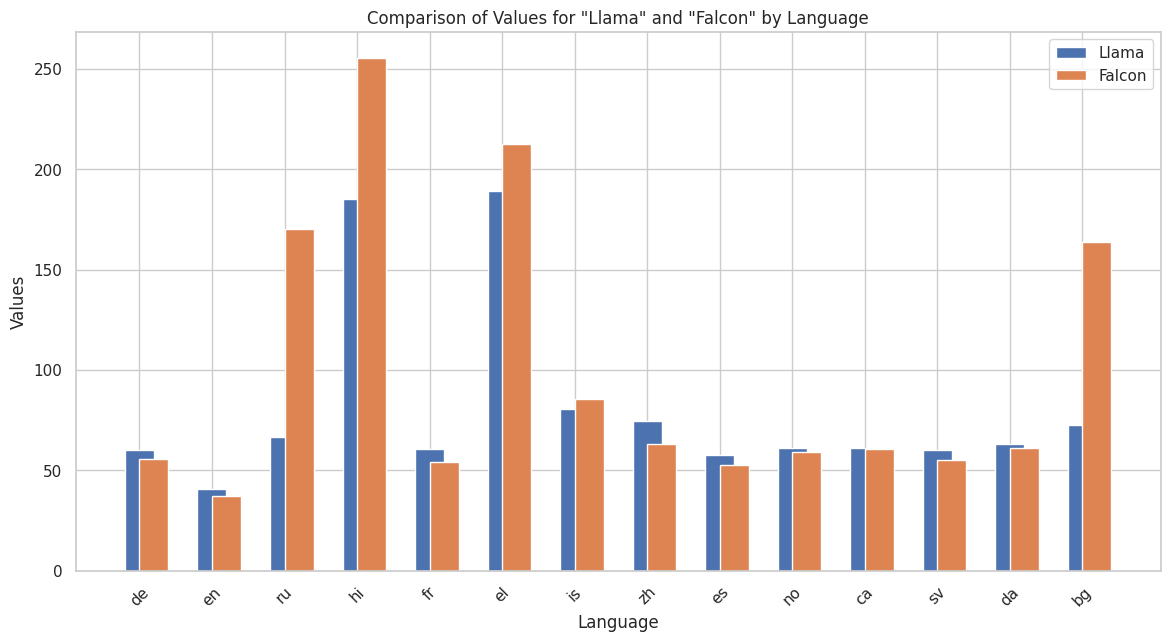

In [6]:
df = pd.DataFrame.from_dict(data)
print(df.to_csv(float_format='%.2f'))

plt.figure(figsize=(14, 7))
plt.bar(df.index, df['llama'], width=0.4, label='Llama', align='center')
plt.bar(df.index, df['falcon'], width=0.4, label='Falcon', align='edge')
plt.xlabel('Language')
plt.ylabel('Values')
plt.title('Comparison of Values for "Llama" and "Falcon" by Language')
plt.xticks(df.index, df.index, rotation=45)
plt.legend()

In [7]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'language'}, inplace=True)

# Use pd.melt to transform the dataframe to long format
df = pd.melt(df, id_vars=['language'], value_vars=['llama', 'falcon'],
                           var_name='Model', value_name='Avg. token count')
df

,language,Model,Avg. token count
0,de,llama,60.081988
1,en,llama,40.534161
2,ru,llama,66.679503
3,hi,llama,185.341615
4,fr,llama,60.709317
5,el,llama,189.273292
6,is,llama,80.812422
7,zh,llama,74.480745
8,es,llama,57.455901
9,no,llama,61.152795


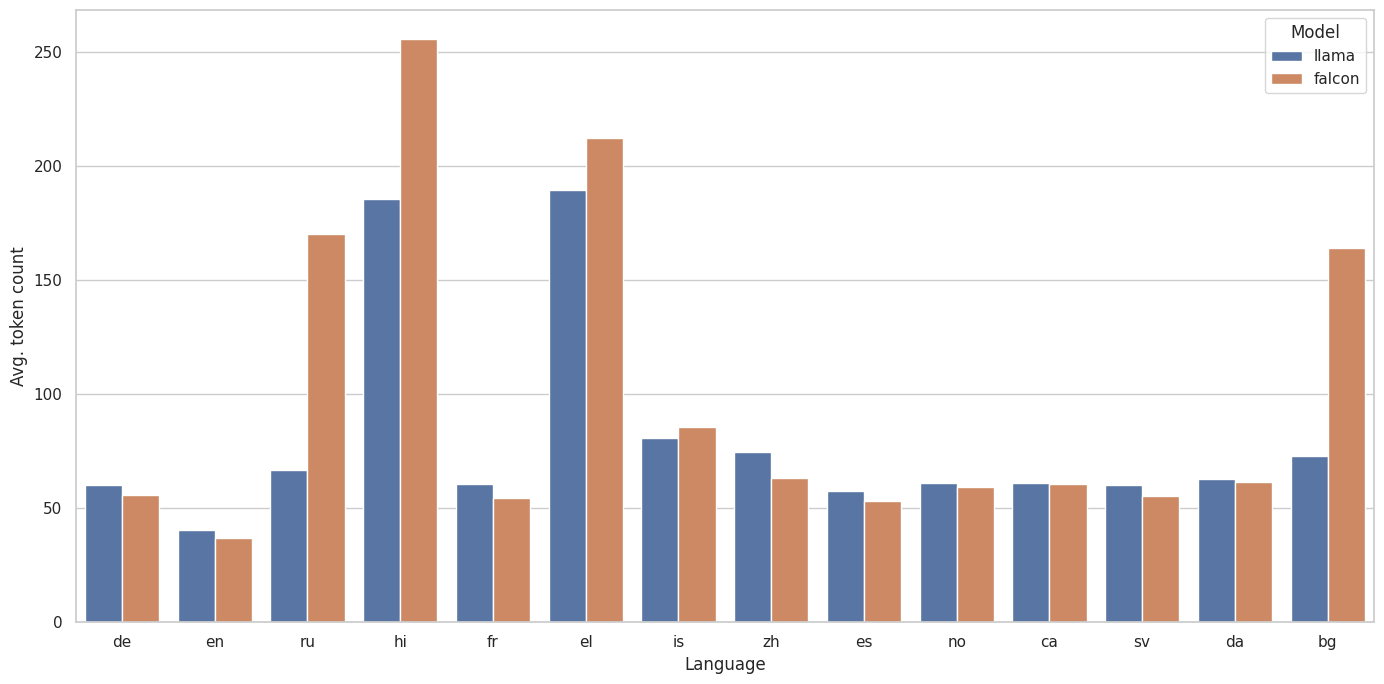

In [11]:

plt.figure(figsize=(14, 7))
sns.barplot(x='language', y='Avg. token count', hue='Model', data=df)
plt.xlabel('Language')
plt.ylabel('Avg. token count')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
# plt.legend(title='Animal')